In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the Necessary Python Libraries.
import numpy as np
import pandas as pd
from scipy.stats import stats
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
sns.set(color_codes=True)
sns.set_palette("deep")
import plotly.graph_objects as ply
import plotly.figure_factory as ff
import plotly.express as px
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

Statement of the Problem 


---


Geely Auto, a Chinese automobile company, aspires to enter the US market by establishing a manufacturing unit there and producing cars locally to compete with their US and European counterparts. 

They have hired an automobile consulting firm to help them understand the factors that influence car pricing. They want to understand the factors influencing car pricing in the American market, which may differ significantly from the Chinese market. The company would like to know: 

- Which variables are significant in predicting car prices? - How well do those variables describe car prices? 

The consulting firm has compiled a large dataset of different types of cars across America based on various market surveys.

**Business Objective **

You must use the available independent variables to model car prices. It will be used by management to determine how prices vary in relation to the independent variables. They can then manipulate the design of the cars, the business strategy, and so on to meet certain price points. Furthermore, the model will help management understand the pricing dynamics of a new market.

In [ ]:
#Loading the Dataset CSV file of Problem Statement.
df=pd.read_csv("/content/drive/MyDrive/Data_Sets/Car_Price_Predictions_Data/CarPrice_Assignment.csv")
pd.options.display.max_columns = 26

In [ ]:
# Checking the first 10 entries of the dataset.
df.head(10) 

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [ ]:
# Checking the last 10 entries of the dataset.
df.tail(10) 

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
195,196,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3034,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0
196,197,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,2935,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0
197,198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3042,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,188.8,67.2,56.2,3045,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0
199,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3157,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


Data Dictionary 

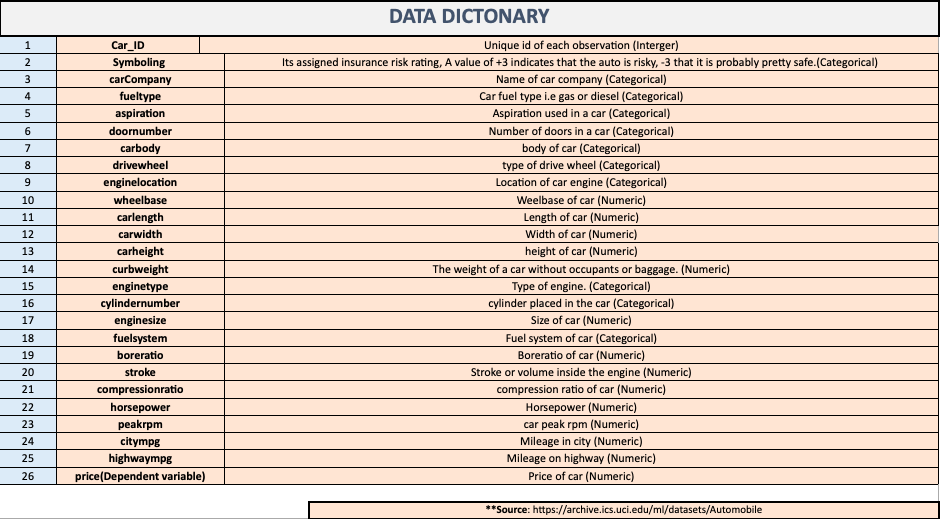

In [ ]:
#Checking the Summary of the Dataset.
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
car_ID,205.0,NaN,NaN,NaN,103.0,59.322565,1.0,52.0,103.0,154.0,205.0
symboling,205.0,NaN,NaN,NaN,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
CarName,205,147,toyota corona,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fueltype,205,2,gas,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,205,2,std,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doornumber,205,2,four,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carbody,205,5,sedan,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drivewheel,205,3,fwd,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enginelocation,205,2,front,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,205.0,NaN,NaN,NaN,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9


**Observations**

From the above table we can infer the count,mean, std , 25% , 50% ,75% and min & max values of the all numeric variables present in the dataset.

From the above table we can infer the count,unique,top,freq of all the categorical variables present in the dataset. 



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**Observation -**

From the above results we can see that there is **no null values** present in the dataset.There are total 205 rows & 26 columns in this dataset,indexed from 0 to 204. Out of 26 variables 8 are float64 , 10 variables are object and 8 variables are int64. Memory used by the dataset: 41.8+ KB.

In [ ]:
#Checking the Shape of the Dataframe.
df.shape

(205, 26)

Observation 

There are 205 entries and 26 columns present in the dataset.

In [ ]:
#Checking for Null Values
df.isnull().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**Observation** - 

There is no null values present in any column of the data set.


In [ ]:
#Checking Duplicate Values
dups=df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


Observation -

There is no duplicated data present in the dataset.

In [ ]:
#Checking for Anomalies in the Dataset
for column in df.columns:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].unique())
    print('\n*************************************************\n')

CAR_ID :  205
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]

*************************************************

SYMBOLING :  6
[ 3  1  2  0 -1 -2]

*************************************************

CARNAME :  147

**Observation - **

There are **no anomalies** present in any column of the datset , but there seems to be some spelling error in the CompanyName column.

i.e. - 
*    maxda = mazda
*   Nissan = nissan
*   porsche = porcshce
*   toyota = toyouta
*   vokswagen = volkswagen =  vw

In [ ]:
#fixing the wrong spellings prsent in the CarName Column 

df['CarName']=np.where(df['CarName'] =='maxda', 'mazda', df['CarName'])
df['CarName']=np.where(df['CarName'] =='porcshce', 'porsche', df['CarName'])
df['CarName']=np.where(df['CarName'] =='toyouta', 'toyota', df['CarName'])
df['CarName']=np.where(df['CarName'] =='vokswagen', 'volkswagen', df['CarName'])
df['CarName']=np.where(df['CarName'] =='vw', 'volkswagen', df['CarName'])


df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

## Univariate Analysis of Categorical Variables

Value counts for column CarName: 
toyota corona           0.0293
toyota corolla          0.0293
peugeot 504             0.0293
subaru dl               0.0195
mitsubishi mirage g4    0.0146
                         ...  
mazda glc 4             0.0049
mazda rx2 coupe         0.0049
maxda glc deluxe        0.0049
maxda rx3               0.0049
volvo 246               0.0049
Name: CarName, Length: 147, dtype: float64


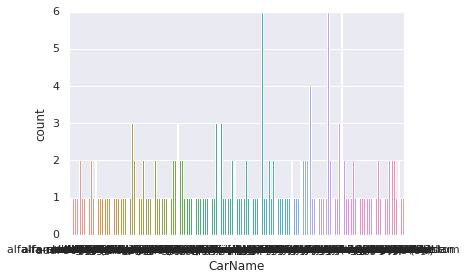

Value counts for column fueltype: 
gas       0.9024
diesel    0.0976
Name: fueltype, dtype: float64


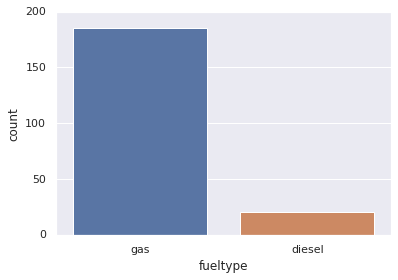

Value counts for column aspiration: 
std      0.8195
turbo    0.1805
Name: aspiration, dtype: float64


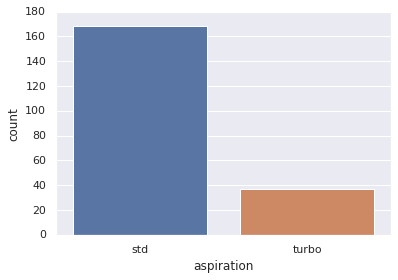

Value counts for column doornumber: 
four    0.561
two     0.439
Name: doornumber, dtype: float64


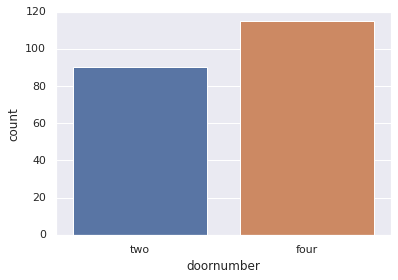

Value counts for column carbody: 
sedan          0.4683
hatchback      0.3415
wagon          0.1220
hardtop        0.0390
convertible    0.0293
Name: carbody, dtype: float64


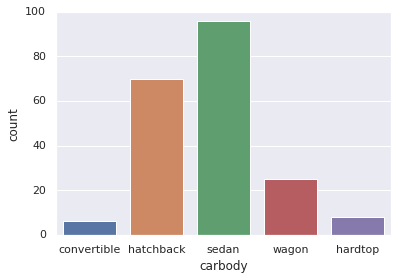

Value counts for column drivewheel: 
fwd    0.5854
rwd    0.3707
4wd    0.0439
Name: drivewheel, dtype: float64


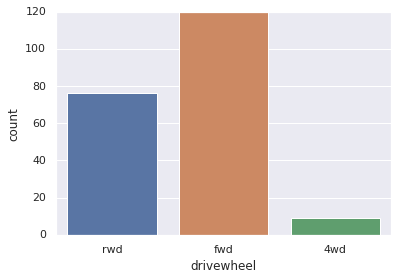

Value counts for column enginelocation: 
front    0.9854
rear     0.0146
Name: enginelocation, dtype: float64


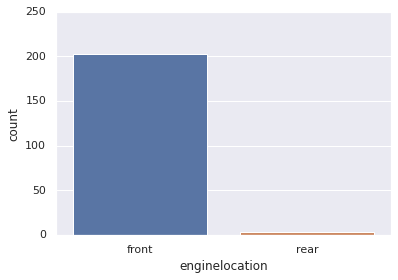

Value counts for column enginetype: 
ohc      0.7220
ohcf     0.0732
ohcv     0.0634
dohc     0.0585
l        0.0585
rotor    0.0195
dohcv    0.0049
Name: enginetype, dtype: float64


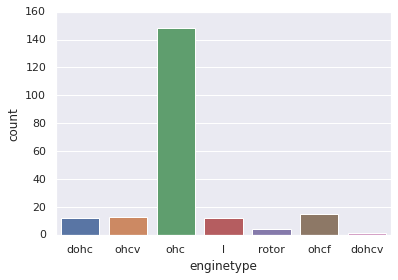

Value counts for column cylindernumber: 
four      0.7756
six       0.1171
five      0.0537
eight     0.0244
two       0.0195
three     0.0049
twelve    0.0049
Name: cylindernumber, dtype: float64


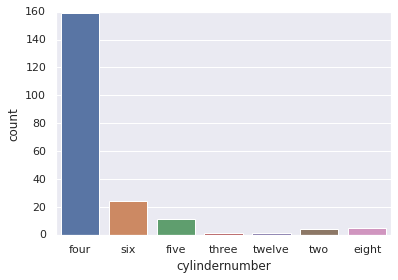

Value counts for column fuelsystem: 
mpfi    0.4585
2bbl    0.3220
idi     0.0976
1bbl    0.0537
spdi    0.0439
4bbl    0.0146
mfi     0.0049
spfi    0.0049
Name: fuelsystem, dtype: float64


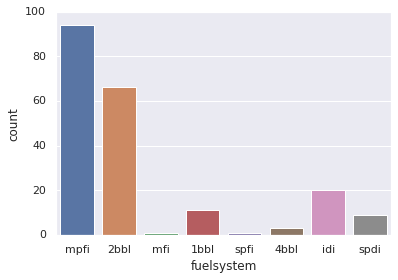

In [ ]:
#Checking the Value counts on all the Categorical Column.

# list of categorical column names
cat_cols = [ 'CarName','fueltype', 'aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber',
            'fuelsystem']

for col in cat_cols:
    # get value counts of the column
    counts = df[col].value_counts(normalize=True).round(4)
    print(f"Value counts for column {col}: \n{counts}")
    
    # plot count plot using seaborn
    sns.countplot(x=col, data=df)
    plt.show()
   

**Insights - **



*  In the CarName column, Toyota Corono, Toyota Corolla, and Peugeot 504 have the highest frequency of 6, while Mazda RX3 and Volvo 246 have the lowest frequency of 1.

*  Out of the 205 cars, 90% (185 cars) are gas-powered, while 10% (20 cars) are diesel-powered.

*   82% (168 cars) of the 205 vehicles have standard aspiration, while the remaining 18% (37 cars) have turbo aspiration.

*   Out of 205 cars, 56% (155 cars) had door-type four and the remaining 44% (90 cars) had door-type two.

*   Out of 205 cars, 47% (96 cars) are sedans, 34% (70 cars) are hatchbacks, 12% (25 cars) are wagons, 4% (8 cars) are hardtops, and only 3% (6 cars) are convertibles.

*  Out of 205 cars, 59% (120 cars) had **"fwd"** drive wheels, 37% (76 cars) had **"rwd"** drive wheels, and the remaining 4% (9 cars) had **"4wd"** drive wheels.

*   The engine is located in the "front" of 99% of the 205 vehicles (202 cars). Only 1%, or three cars, have the engine in the rear.

*  The majority of cars, roughly 72% (148 cars), have "ohc" engines, with the remainder distributed as follows: 7% (15 vehicles) have the engine type "ohcf." 6% (13 cars) have a "ohcv" engine, while 6% (12 cars) have a "dohc" engine. There are 6% (12 vehicles) with "l" engine types, 2% (4 vehicles) with "rotor" engine types, and one (1) vehicle with a "dohcv" engine type.

*   The majority of cars, approximately 78% (159 cars), have **four cylinders**, 12% (24 cars) have **six cylinders**, 5% (11 cars) have **five cylinders**, 2% (five cars) have** eight cylinders**, approximately 2% (four cars) have **two cylinders**, and 0.49% (one car) have **three cylinders**. There is only one car, the **"buick regal sport coupe (turbo)**," with **12 cylinders**.

*   45% i.e (94 cars) has "mpfi" fuel system , 32% i.e.(66 Cars) has "2bbl" fuel system , 9% i.e.(20 cars) runs on "idi" fuel system , 5% i.e. (11 cars) has "lbbl" fuel system , 4% i.e.(9 cars) has "spdi" fuel system , 0.014% i.e.(3 Cars) has " 4bbl" fuel system and there is only 1-1 car which has "mfi" and "spfi" fuel systems.

In [ ]:
#checking the car which have engine type "dohcv"
df[df["enginetype"] =='dohcv'] 

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
129,130,1,porsche cayenne,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5


Insight - 

porsche cayenne is the only car present in the dataset which has engine type "dohcv"

In [ ]:
#checking the car which has 12 number of cylinders
df[df["cylindernumber"] =='twelve']

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0


Insight - 

jaguar xk is the only car which has 12 number of cylinders.

In [ ]:
# car which has maximum price 
df[df['price']>=45000]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.8,3.35,8.0,184,4500,14,16,45400.0


Insight -

buick regal sport coupe (turbo) is most expensive car as per data.

## ***#Univariate Analysis of Numerical Variables - checking the distribution of the data and outliers.***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<AxesSubplot:xlabel='symboling'>

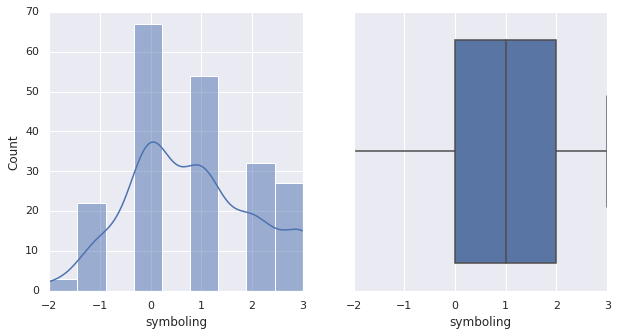

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['symboling'], kde=True, ax=axes[0])
sns.boxplot(x='symboling', data=df, ax=axes[1])

In [ ]:
df['symboling'].describe().round(2)

count    205.00
mean       0.83
std        1.25
min       -2.00
25%        0.00
50%        1.00
75%        2.00
max        3.00
Name: symboling, dtype: float64

Insights - 

* Symboling - The risk rating of an automobile ("A number of +3 indicates that the auto is risky, -3 suggests that it is probably relatively safe") goes from -2 to 3. 

* The average risk rating factor is typically about 0.83. 

* The symboling standard deviation is 1.25. 

* The symbols for 25%, 50% (median), and 75% are 0, 1, and 2. 
i.e. 25% of automobiles have a Risk Rating of 0 and 50% of cars have a RisK Raring of 1. 

* There are no outliers in the symboling feature.

<AxesSubplot:xlabel='wheelbase'>

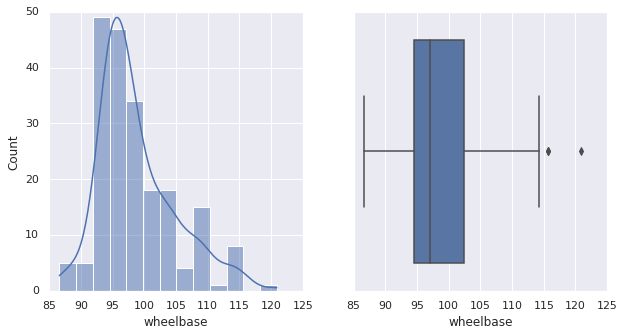

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['wheelbase'], kde=True, ax=axes[0])
sns.boxplot(x='wheelbase', data=df, ax=axes[1])

In [ ]:
df['wheelbase'].describe().round(2)

count    205.00
mean      98.76
std        6.02
min       86.60
25%       94.50
50%       97.00
75%      102.40
max      120.90
Name: wheelbase, dtype: float64

Insights - 

* The wheelbase - "the distance between the center of the front wheels and the center of the rear wheels" - ranges from 86.60 cms to 120.90 cms. 

* The average car's wheelbase is around 98.76 cms. 

* The standard deviation of wheelbase is approximately 6.02 cms. 

* The 25%, 50% (median), and 75% wheelbases are 94.50 cms, 97.0 cms, and 102.40 cms, respectively. Specifically, 25% of autos have a wheelbase of 94.50 cms and 50% of automobiles have a wheelbase of 97.0 cms. 

* There are a few outliers in the wheelbase characteristic, indicating that some cars have a longer wheelbase than others.

<AxesSubplot:xlabel='carlength'>

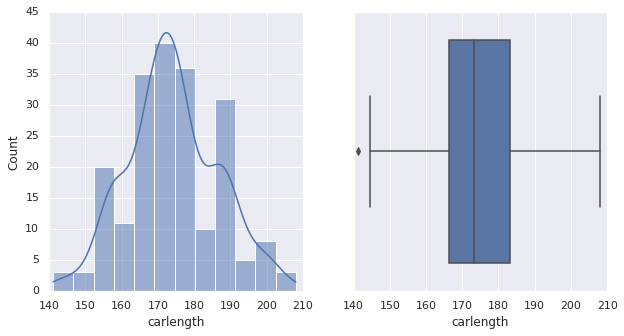

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['carlength'], kde=True, ax=axes[0])
sns.boxplot(x='carlength', data=df, ax=axes[1])

In [ ]:
df["carlength"].describe().round(2)

count    205.00
mean     174.05
std       12.34
min      141.10
25%      166.30
50%      173.20
75%      183.10
max      208.10
Name: carlength, dtype: float64

Insights - 

* Carlength - The length of car ranges from 141.10 cms to 208.10 cms. 

* The average car length is around 174.05 cms. 

* The standard deviation of an automobile is around 12.34 cms. 

* Carlengths at 25%, 50% (median), and 75% are 166.30 cms, 173.20 cms, and 183.10 cms, respectively. Specifically, 25% of automobiles have a carlength of 166.30 cms and 50% have a carlength of 173.20 cms. 

* The carlength characteristic contains a few outliers, showing that some cars have a shorter carlength than others.

<AxesSubplot:xlabel='carwidth'>

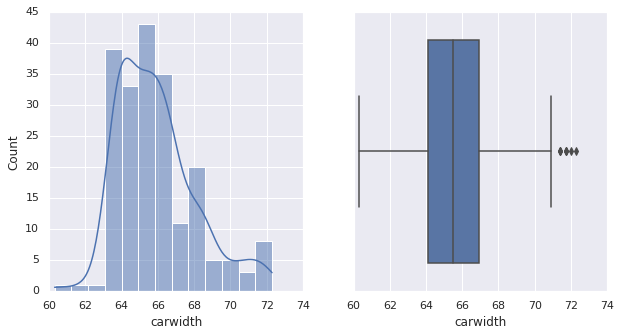

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['carwidth'], kde=True, ax=axes[0])
sns.boxplot(x='carwidth', data=df, ax=axes[1])

In [ ]:
df["carwidth"].describe().round(2)

count    205.00
mean      65.91
std        2.15
min       60.30
25%       64.10
50%       65.50
75%       66.90
max       72.30
Name: carwidth, dtype: float64

Insights -

*  Carwidth - The width of a car ranges from 60.30 cms to 72.30 cms. 

* The average width of a car is 65.91 cms. 

* The standard variance in carwidth is 2.15 cms. 

* At 25%, 50% (median), and 75%, the width of an automobile is 64.10 cms, 65.50 cms, and 66.90 cms, respectively. 25% of automobiles have a car width of 64.10 cms, while 50% of automobiles have a car width of 65.50 cms. 

* The carlwidth characteristic has a few outliers, showing that some cars have a wider carwidth than others.

<AxesSubplot:xlabel='carheight'>

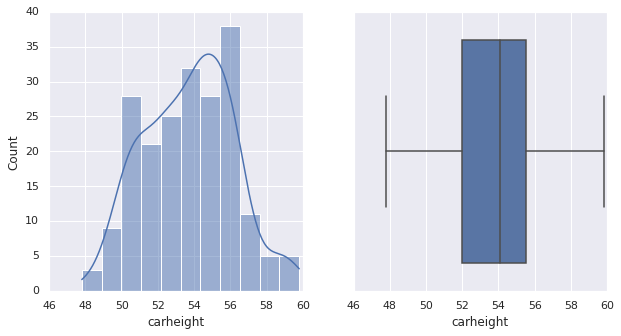

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['carheight'], kde=True, ax=axes[0])
sns.boxplot(x='carheight', data=df, ax=axes[1])

In [ ]:
df["carheight"].describe().round(2)

count    205.00
mean      53.72
std        2.44
min       47.80
25%       52.00
50%       54.10
75%       55.50
max       59.80
Name: carheight, dtype: float64

Insights -

* Carheight - car's height ranges from 47.80 cms to 59.80 cms. 

* A car's average height is 53.72 cms. 

* The carheight standard deviation is 2.44 cms. 

* The heigth of an automobile at 25%, 50% (median), and 75% is 52.00 cms, 54.10 cms, and 55.50 cms, respectively. 25% of cars have a height of 52.00 cms, while 50% have a car height of 54.10 cms. 

* There are no outliers in the carheight characteristic, indicating that cars have roughly same car height.

<AxesSubplot:xlabel='curbweight'>

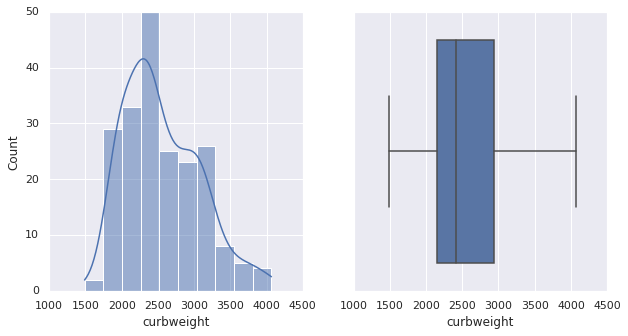

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['curbweight'], kde=True, ax=axes[0])
sns.boxplot(x='curbweight', data=df, ax=axes[1])

In [ ]:
df["curbweight"].describe().round(2)

count     205.00
mean     2555.57
std       520.68
min      1488.00
25%      2145.00
50%      2414.00
75%      2935.00
max      4066.00
Name: curbweight, dtype: float64

Insigths - 

* Curbweight - "the weight of an automobile without occupants or luggage" - ranges from 1488.00 kgs to 4066.00 kgs. 

* The average curbweight of a car is 2555.57 kg. 

* The standard deviation curbweight is approximately 520.68 kgs. 

* The curbweight of an automobile at 25%, 50% (median), and 75% is 2145.00 kgs, 2414 kgs, and 2935.00 kgs, respectively. 25% of cars have a height of 2145.00 kgs, whereas 50% have a curbweight of 2414.00 kgs. 

* There are no outliers in the carheight characteristic, indicating that cars have nearly the same curbweight.

<AxesSubplot:xlabel='enginesize'>

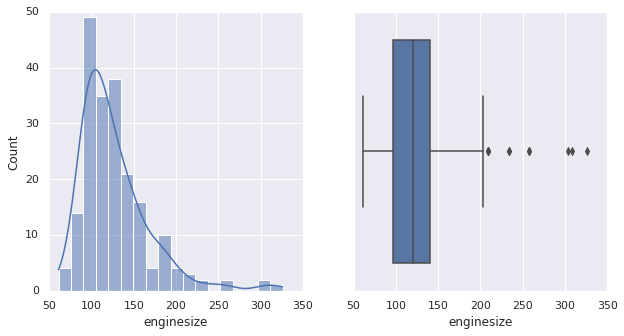

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['enginesize'], kde=True, ax=axes[0])
sns.boxplot(x='enginesize', data=df, ax=axes[1])

In [ ]:
df["enginesize"].describe().round(2)

count    205.00
mean     126.91
std       41.64
min       61.00
25%       97.00
50%      120.00
75%      141.00
max      326.00
Name: enginesize, dtype: float64

Insights - 

Note - Engine Size is the volume of fuel and air that can be pushed through a car's cylinders  genrally measured in cc.

* Engine Size -ranges from 61.00 cc to 326.00 kgs.

* The average enginesize of a car is 126.91 cc.

* The standard deviation enginesize is approximately 41.64 cc.

* The enginesize of an automobile at 25%, 50% (median), and 75% is 97.00 cc, 120.00cc , and 141.00 cc, respectively. 25% of cars have a enginesize 97.00 cc, whereas 50% have a enginesize of 120 cc.

* Outliers in the enginesize characteristic indicate that some cars have larger engines.

<AxesSubplot:xlabel='boreratio'>

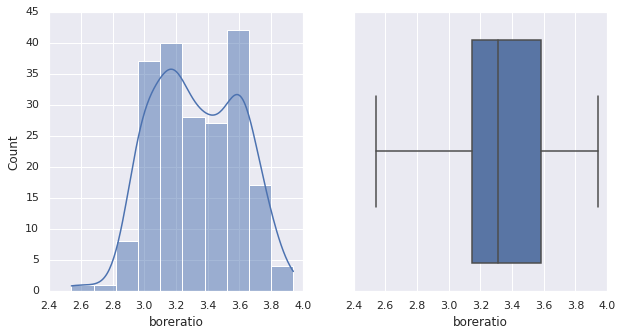

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['boreratio'], kde=True, ax=axes[0])
sns.boxplot(x='boreratio', data=df, ax=axes[1])

In [ ]:
df["boreratio"].describe().round(2)

count    205.00
mean       3.33
std        0.27
min        2.54
25%        3.15
50%        3.31
75%        3.58
max        3.94
Name: boreratio, dtype: float64

Insights -

Note - bore ratio plays a vital part in the way it produces power. The bore-stroke ratio and the cylinder volume affect the exhaust emissions and the fuel consumption of an engine.

* BoreRatio -ranges from 2.54 to 3.94.

* The average boreratio of a car is 3.33.

* The standard deviation borereatio is approximately 0.27.

* The boreratio of an automobile at 25%, 50% (median), and 75% is 3.15 , 3.31 , and 3.58 , respectively. 25% of cars have a boreratio 3.15 , whereas 50% have a boreratio of 3.31.

* There are no outliers in the boreratio characteristic, indicating that all autos have relatively equal boreratios.

<AxesSubplot:xlabel='stroke'>

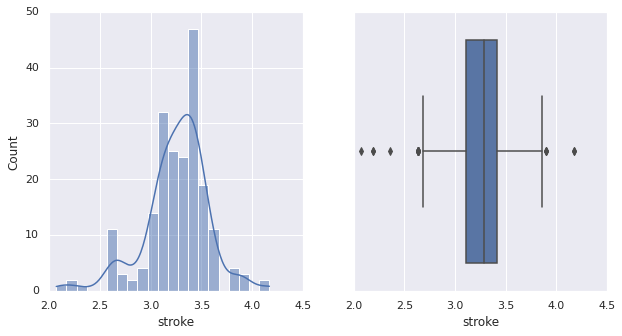

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['stroke'], kde=True, ax=axes[0])
sns.boxplot(x='stroke', data=df, ax=axes[1])

In [ ]:
df["stroke"].describe().round(2)

count    205.00
mean       3.26
std        0.31
min        2.07
25%        3.11
50%        3.29
75%        3.41
max        4.17
Name: stroke, dtype: float64

Insights - 

Note - It is used to calculated the engine capacity (cylinder volume). Stroke. The distance traveled by the piston from its topmost positions (also called as Top dead centre TDC), to its bottom most position (or bottom dead centre BDC) is called stroke it will be two times the crank radius

* Stroke or volume inside the engine - ranges from 2.07 to 4.17.

* The average stroke of a car is 3.26.

* The standard deviation stoke is approximately 0.31.

* The stroke of an automobile at 25%, 50% (median), and 75% is 3.11 , 3.29 , and 3.41 , respectively. 25% of cars have a stroke value of 3.11 , whereas 50% have a stroke value of 3.29.

* Outliers in the stroke characteristic indicate that all automobiles have differences in the stroke on both the upper and lower sides.

<AxesSubplot:xlabel='compressionratio'>

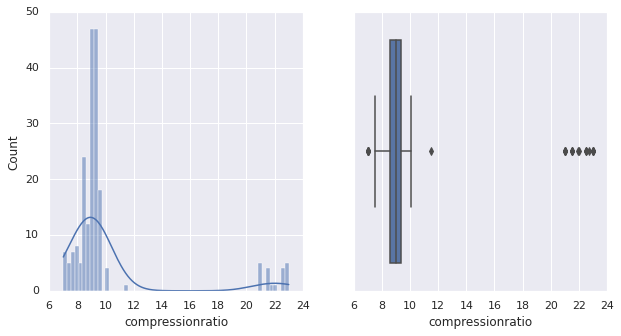

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['compressionratio'], kde=True, ax=axes[0])
sns.boxplot(x='compressionratio', data=df, ax=axes[1])

In [ ]:
df['compressionratio'].describe().round(2)

count    205.00
mean      10.14
std        3.97
min        7.00
25%        8.60
50%        9.00
75%        9.40
max       23.00
Name: compressionratio, dtype: float64

Insights - 

Note -  A higher compression ratio (CR) is beneficial for engines. That's because the higher ratio allows for an engine to extract more energy from the combustion process due to better thermal efficiency. Higher compression ratios allow the same combustion temperatures to be achieved with less fuel.

* Compression Ratio - ranges from 7.00 to 23.00.

* The average compressionratio of a car is 10.14.

* The standard deviation of compressionratio is approximately 3.97.

* The compressionratio of an automobile at 25%, 50% (median), and 75% is 8.60 , 9.00, and 9.40 , respectively. 25% of cars have a compression value of 8.60 , whereas 50% have a compression ratio value of 9.00.

* Outliers in the compressionratio characteristic indicate that all automobiles have differences in the compressionratio on both the upper and lower sides.

<AxesSubplot:xlabel='horsepower'>

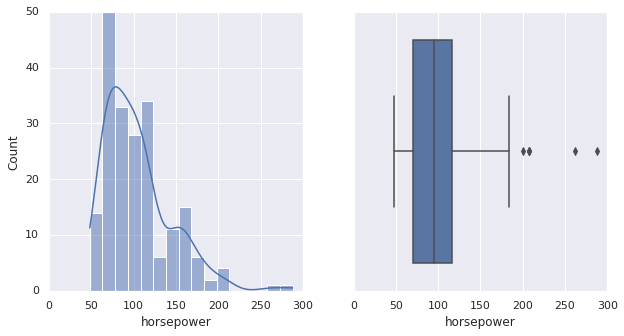

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['horsepower'], kde=True, ax=axes[0])
sns.boxplot(x='horsepower', data=df, ax=axes[1])

In [ ]:
df["horsepower"].describe().round(2)

count    205.00
mean     104.12
std       39.54
min       48.00
25%       70.00
50%       95.00
75%      116.00
max      288.00
Name: horsepower, dtype: float64

Insights - 

Note - Horsepower refers to how much power your engine can produce in a certain amount of time. So, the more horsepower that your engine has, the faster you will be able to go.

* Horsepower - ranges from 48.00 hp to 288.00 hp.

* The average horsepower of a car is 104.12 hp.

* The standard deviation of horsepower  is approximately 39.54 hp.

* The horsepower of an automobile at 25%, 50% (median), and 75% is 70.00 hp , 95.00 hp , and 116.00 hp , respectively. 25% of cars have a horsepower value of 70.00 hp , whereas 50% have a horsepower value of 95.00 hp.

* Outliers in the horsepower attribute indicate that all automobiles have differences in the horsepower value on  the upper side.

<AxesSubplot:xlabel='peakrpm'>

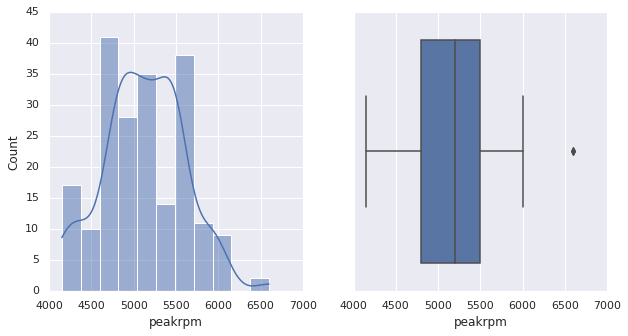

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['peakrpm'], kde=True, ax=axes[0])
sns.boxplot(x='peakrpm', data=df, ax=axes[1])

In [ ]:
df["peakrpm"].describe().round(2)

count     205.00
mean     5125.12
std       476.99
min      4150.00
25%      4800.00
50%      5200.00
75%      5500.00
max      6600.00
Name: peakrpm, dtype: float64

Insights - 

Note - Simply, RPM stands for revolutions per minute (or revs per minute) and this significant gauge tells the driver how fast the engine is spinning. A typical engine rev-range is from an idle of between 500 and 1000rpm, and a maximum speed of about 6000 to 7000rpm.

* peakrpm - ranges from 4150.00 rpm to 6600.00 rpm.

* The average peakrpm of a car is 5125.12 rpm.

* The standard deviation of peakrpm  is approximately 476.99 rpm.

* The peakrpm of an automobile at 25%, 50% (median), and 75% is 4800.00 rpm, 5200.00 rpm , and 5500.00 rpm , respectively. 25% of cars have a peakrpm value of 4800.00 rpm , whereas 50% have a peakrpm value of  5500.00. rpm.

*  A few outliers in the peakrpm attribute indicate that few automobiles have differences in the peakrpm value on the upper side.

<AxesSubplot:xlabel='citympg'>

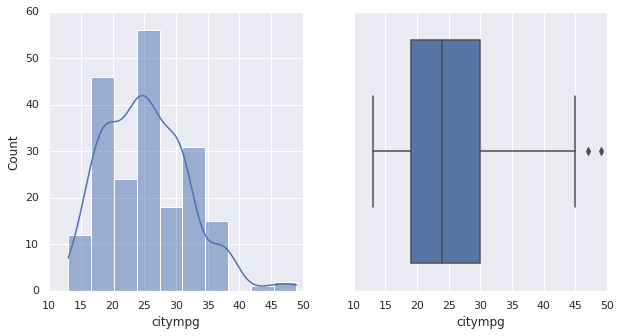

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['citympg'], kde=True, ax=axes[0])
sns.boxplot(x='citympg', data=df, ax=axes[1])

In [ ]:
df["citympg"].describe().round(2)

count    205.00
mean      25.22
std        6.54
min       13.00
25%       19.00
50%       24.00
75%       30.00
max       49.00
Name: citympg, dtype: float64

Insights - 

Note - Citympg : the score a car will get on average in city conditions, with stopping and starting at lower speeds

* citympg - ranges from 13.00 mpg to 49.00 mpg.

* The average citympg of a car is 25.22 mpg.

* The standard deviation of citympg is approximately 6.54 mpg.

* The citympg of an automobile at 25%, 50% (median), and 75% is 19.00 mpg, 24.00 mpg , and 30.00 mpg ,respectively. 25% of cars have a citympg value of 19.00 mpg , whereas 50% have a citympg value of  24.00 mpg.

*  A few outliers in the citympg attribute indicate that few automobiles have differences in the citympg value on the upper side.

<AxesSubplot:xlabel='highwaympg'>

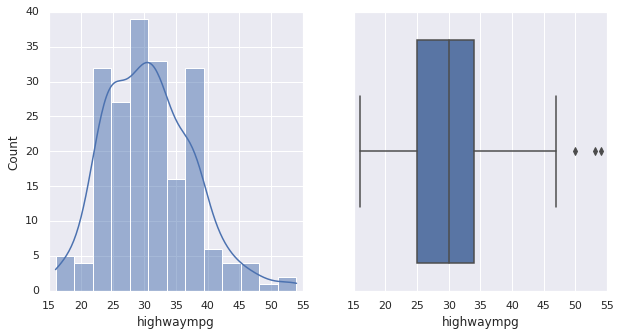

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['highwaympg'], kde=True, ax=axes[0])
sns.boxplot(x='highwaympg', data=df, ax=axes[1])

In [ ]:
df["highwaympg"].describe().round(2)

count    205.00
mean      30.75
std        6.89
min       16.00
25%       25.00
50%       30.00
75%       34.00
max       54.00
Name: highwaympg, dtype: float64

Insights - 

Note - Highwaympg :  the average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed.

* highwaympg - ranges from 16.00 mpg to 54.00 mpg.

* The average highwaympg of a car is 30.75 mpg.

* The standard deviation of highwaympg is approximately 6.89 mpg.

* The highwaympg of an automobile at 25%, 50% (median), and 75% is 25.00 mpg, 30.00 mpg , and 34.00 mpg ,respectively. 25% of cars have a highwaympg value of 25.00 mpg , whereas 50% have a highwaympg value of  30.00 mpg.

*  A few outliers in the highwaympg attribute indicate that few automobiles have differences in the highwaympg value on the upper side.

<AxesSubplot:xlabel='price'>

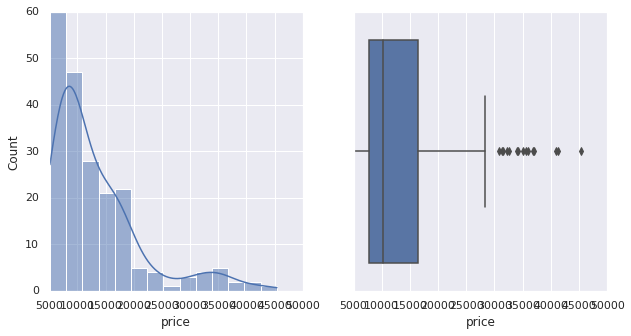

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['price'], kde=True, ax=axes[0])
sns.boxplot(x='price', data=df, ax=axes[1])

In [ ]:
df["price"].describe().round(2)

count      205.00
mean     13276.71
std       7988.85
min       5118.00
25%       7788.00
50%      10295.00
75%      16503.00
max      45400.00
Name: price, dtype: float64

Mean > Median > Mode

Insights - 

Note - Price :  Price of Car in  $USD.

* Price - ranges from USD 5118.00 to USD 45400.00 .

* The average price of a car is USD 13276.71.

* The standard deviation of price is approximately USD 7988.85.

* The price of an automobile at 25%, 50% (median), and 75% is USD 7788.00, USD 10295.00, and USD 16503.00 ,respectively. 25% of cars have a price value of USD 7788.00 , whereas 50% have a price value of  USD 10295.00.

*  Outliers in the price attribute indicate that there automobiles present in the dataset which high price value on the upper side.

* The distribution of the price attribute is right skewed shows Mean value of car > Median value of car , data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below USD 18,500, whereas the remaining 15% are between USD 18,500 and USD 45,400.)

Observation -

There are outliers in various columns of the dataset **[wheel base, automobile length, engine size, stroke, compression ratio, horse power, peak rpm, city mpg ,highway mpg and price (target column)]**. Because each car has its own  specifications, the price of the car may vary depending on these qualities. Hence, for this particular situation, we decided not to use outlier treatment and instead do the analysis on the same data we had. As a result, we can forecast the precise price of the car based on the attributes in the dataset.

### Bivariate analysis

Scatter Plot
A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.


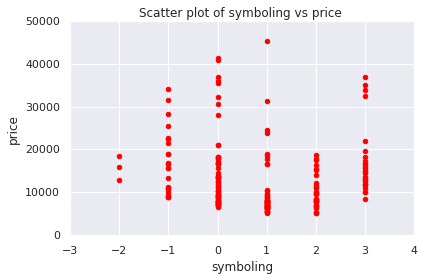

In [ ]:
plt.scatter(df['symboling'],df['price'],color="RED")
plt.title("Scatter plot of symboling vs price ")
plt.xlabel("symboling")
plt.ylabel("price")
plt.tight_layout()
plt.show()

Insights -

* There is no such relationship between symbolings and price features. 

* Vehicles with symboling values 0 and 1 are more expensive than others.

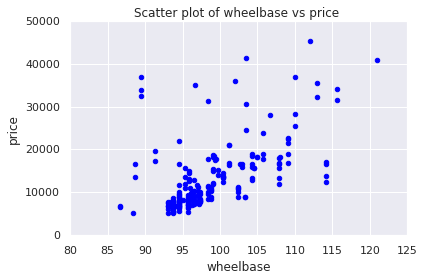

In [ ]:
plt.scatter(df['wheelbase'],df['price'],color="Blue")
plt.title("Scatter plot of wheelbase vs price ")
plt.xlabel("wheelbase")
plt.ylabel("price")
plt.tight_layout()
plt.show()

Insights -

* There is a positive link between wheelbase and price; as the value of the wheelbase increases, so does the price of the car.The majority of cars have a wheel base of 95 cms to 102 cms and a price range of USD 10000 to USD 15000.

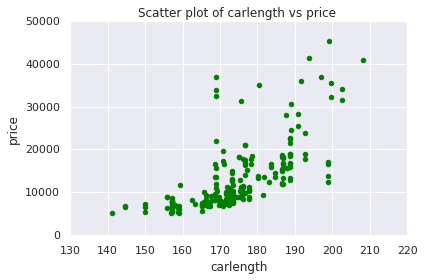

In [ ]:
plt.scatter(df['carlength'],df['price'],color="Green")
plt.title("Scatter plot of carlength vs price ")
plt.xlabel("carlength")
plt.ylabel("price")
plt.tight_layout()
plt.show()

Insights -

* Carlength and price have a positive relationship; as the value of the carlength increases, so does the price of the car. The majority of cars range in length from 155 cms to 185 cms and cost between USD 8000 and USD 18000.

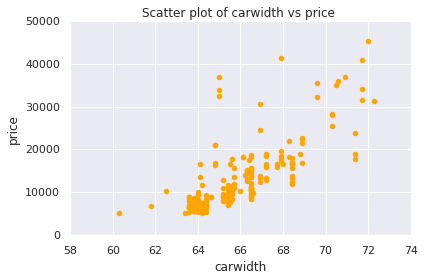

In [ ]:
plt.scatter(df['carwidth'],df['price'],color="Orange")
plt.title("Scatter plot of carwidth vs price ")
plt.xlabel("carwidth")
plt.ylabel("price")
plt.tight_layout()
plt.show()

Insights -

* Carwidth and price have a positive association; as the value of the carwidth increases, so does the price of the car. The majority of cars range in width from 63 cms to 68 cms and cost between USD 8000 and USD 18000.

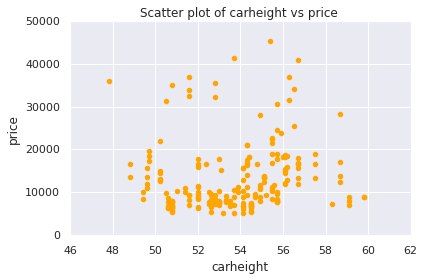

In [ ]:
plt.scatter(df['carheight'],df['price'],color="Orange")
plt.title("Scatter plot of carheight vs price ")
plt.xlabel("carheight")
plt.ylabel("price")
plt.tight_layout()
plt.show()

Insights - 

* There is no such positive association between carheight and price, but cars with car heights ranging from 55 cms to 58 cms may be more in terms of price.

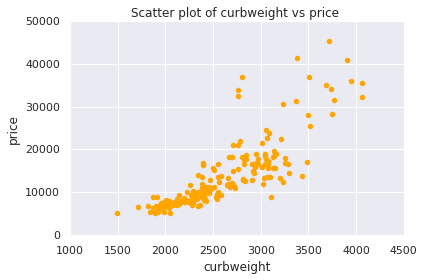

In [ ]:
plt.scatter(df['curbweight'],df['price'],color="Orange")
plt.title("Scatter plot of curbweight vs price ")
plt.xlabel("curbweight")
plt.ylabel("price")
plt.tight_layout()
plt.show()

Insights - 

* The bulk of cars had curbweights ranging from 2000 kgs to 3000 kgs and prices ranging from USD 8000 to USD 18500, indicating a positive association between curbweight and price.

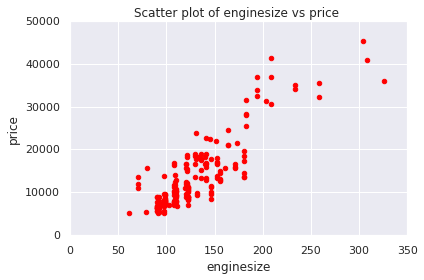

In [ ]:
plt.scatter(df['enginesize'],df['price'],color="Red")
plt.title("Scatter plot of enginesize vs price ")
plt.xlabel("enginesize")
plt.ylabel("price")
plt.tight_layout()
plt.show()

Insights -

* There is a positive relationship between engine size and price; as engine size increases, it also raises the price of the car. The majority of cars have engine sizes ranging from 100 cc to 150 cc and are priced between USD 8000 and USD 18000.

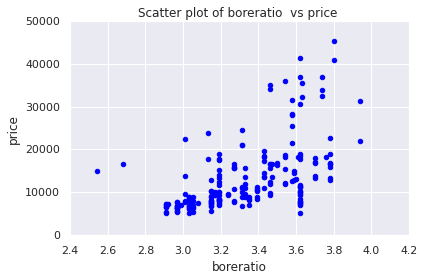

In [ ]:
plt.scatter(df['boreratio'],df['price'],color="Blue")
plt.title("Scatter plot of boreratio  vs price ")
plt.xlabel("boreratio")
plt.ylabel("price")
plt.tight_layout()
plt.show()

Insights

* There is also a relationship between boreratio and pricing; the price of cars rises as boreratio rises. The majority of cars have boreratios ranging from 2.9 to 3.5 and cost between USD 8000 and USD 18000.

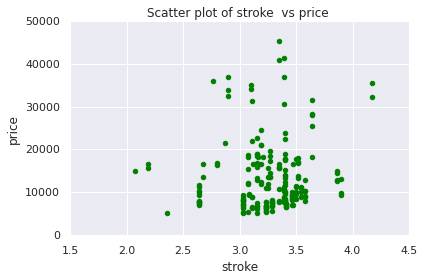

In [ ]:
plt.scatter(df['stroke'],df['price'],color="Green")
plt.title("Scatter plot of stroke  vs price ")
plt.xlabel("stroke")
plt.ylabel("price")
plt.tight_layout()
plt.show()

Insight 

* A lack of interaction between stroke and price, and the distribution of stroke datapoints is centered somewhat on mean value.

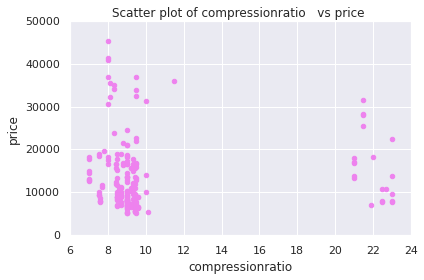

In [ ]:
plt.scatter(df['compressionratio'],df['price'],color="Violet")
plt.title("Scatter plot of compressionratio   vs price ")
plt.xlabel("compressionratio")
plt.ylabel("price")
plt.tight_layout()
plt.show()

Insight 

* There is no interaction among compressionratio and pricing, and there isn't any pattern.

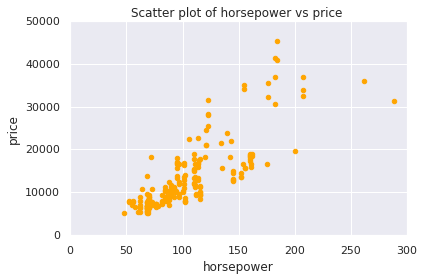

In [ ]:
plt.scatter(df['horsepower'],df['price'],color="Orange")
plt.title("Scatter plot of horsepower vs price ")
plt.xlabel("horsepower")
plt.ylabel("price")
plt.tight_layout()
plt.show()

Insigths 

* There is a significant relationship between horsepower and price; as horsepower increases, it also raises the price of the car. Horsepower is a good predictor of a car's pricing.

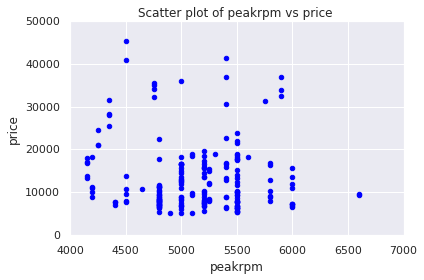

In [ ]:
plt.scatter(df['peakrpm'],df['price'],color="Blue")
plt.title("Scatter plot of peakrpm vs price ")
plt.xlabel("peakrpm")
plt.ylabel("price")
plt.tight_layout()
plt.show()

Insights 

* Peakrpm and price do not have any significant relationship.

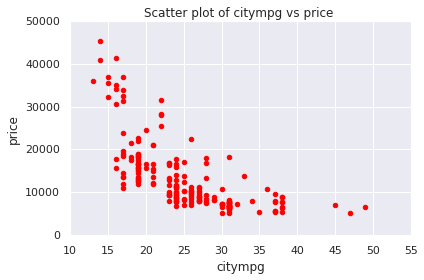

In [ ]:
plt.scatter(df['citympg'],df['price'],color="Red")
plt.title("Scatter plot of citympg vs price ")
plt.xlabel("citympg")
plt.ylabel("price")
plt.tight_layout()
plt.show()

Insights 

* There is a negative relationship between citympg and price, as the price of a car drops as citympg increases. citympg might be a good predictor for predicting car's price.i.e. car which has high city mpg has lower price and vice-versa.

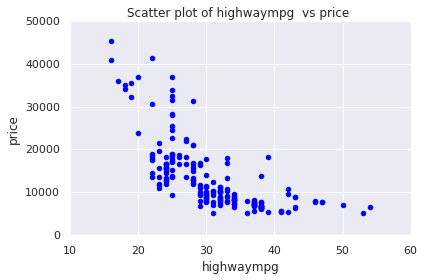

In [ ]:
plt.scatter(df['highwaympg'],df['price'],color="Blue")
plt.title("Scatter plot of highwaympg  vs price ")
plt.xlabel("highwaympg")
plt.ylabel("price")
plt.tight_layout()
plt.show()

Insights 

* There is a negative relationship between highwaympg and price, as the price of a car drops as highwaympg increases.highwaympg might be a good predictor for predicting car's price.i.e. car which has high highway mpg has lower price and vice-versa.

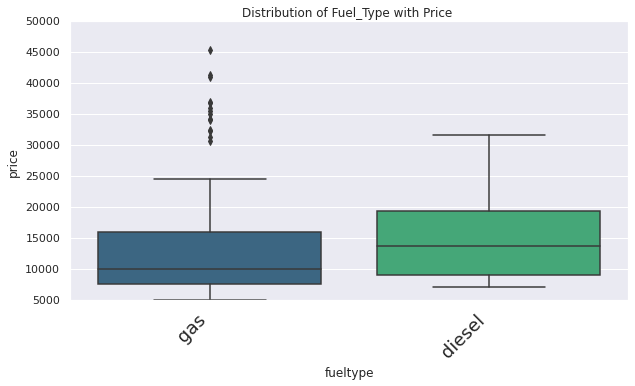

In [ ]:
plt.figure(figsize=(10,5))
chart=sns.boxplot(x="fueltype", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Distribution of Fuel_Type with Price ')
chart;

Insights -

* The median price of diesel vehicles is higher than that of gasoline vehicles. But there are some gas-powered autos with high prices in the dataset. 

* The price of the  car not varies too much depending on the fuel type. 

* 50% of gas-powered cars have a price range of USD 8000 to USD 10,000, whereas some gas-powered cars have a higher price range of USD 28000 to USD 45500.

* Disel powered cars have a considerably wider price distribution than gas fueled cars.

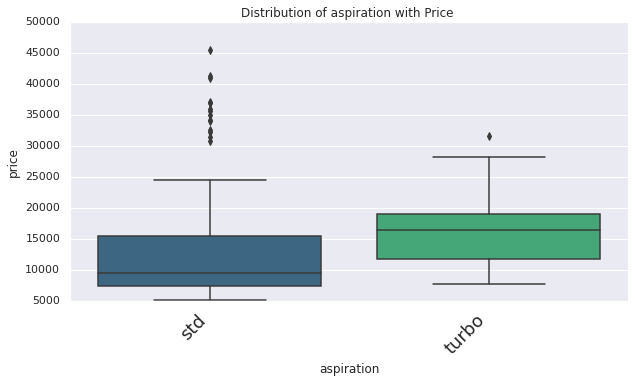

In [ ]:
plt.figure(figsize=(10,5))
chart=sns.boxplot(x="aspiration", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Distribution of aspiration with Price ')
chart;

Insights -

* The median price of turbo aspiration vehicles is higher than that of standard aspiration vehicles. But there are some standard aspiration autos with high prices present in the dataset. 

* The price of the car varies depending on the aspiration of car. 

* 50% of standard aspiration cars have a price range of USD 8000 to USD 10,000, whereas  50 % of turbo aspiration cars have a price range of USD 12000 to USD 18000.

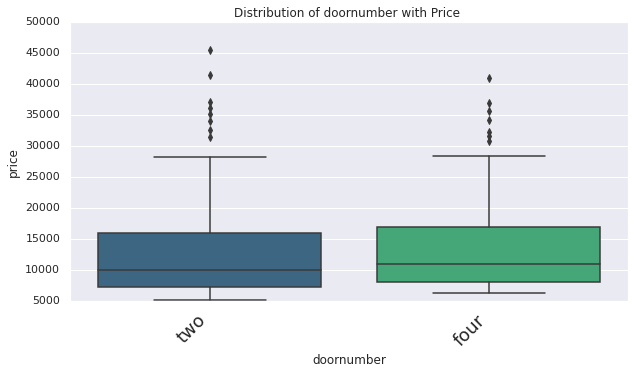

In [ ]:
plt.figure(figsize=(10,5))
chart=sns.boxplot(x="doornumber", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Distribution of doornumber with Price ')
chart;

Insights -

* There is no variation in the distribution of prices with respect to door numbers; it appears nearly equivalent, and the median values are likewise nearly equivalent.

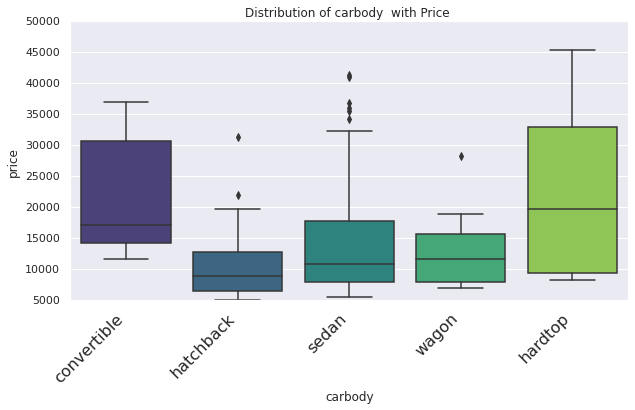

In [ ]:
plt.figure(figsize=(10,5))
chart=sns.boxplot(x="carbody", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=16)
plt.title('Distribution of carbody  with Price ')
chart;

Insight -


* The cost of the car varies according to its body type. 

* The price range for a convertible car runs from USD 11000 to USD 37000. 

* Hatchback cars are less expensive than others, with prices ranging from USD 5000 to USD 17000. 

* Sedan and wagon automobiles have nearly identical median values, but sedan cars have a broader distribution. Sedan automobiles are more expensive than wagons and hatchbacks. 

* Hardtop body type automobiles have the highest median price values, implying that hardtop body type cars are often more expensive than others, ranging from USD 9000 to USD 45000.

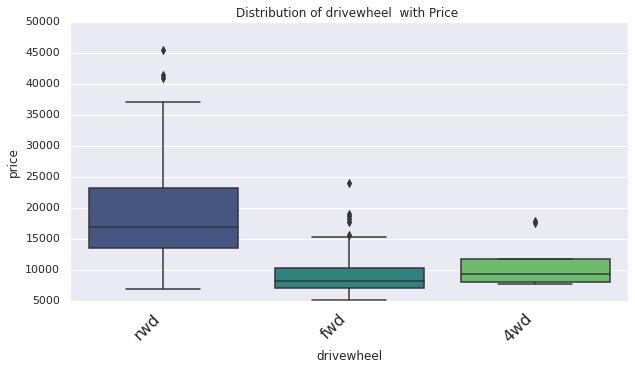

In [ ]:
plt.figure(figsize=(10,5))
chart=sns.boxplot(x="drivewheel", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=16)
plt.title('Distribution of drivewheel  with Price ')
chart;

Insights -

* The cost of the car varies according to its drivewheel.

* The price distribution is greater for "rwd" drivewheel cars than for the other two. 

* The median value for automobiles with "rwd" drive wheels is higher than for others. 

* The beginning price of a "4wd" drivewheel is higher than that of a "rwd" or "fwd" drivewheel. 

* There are a few "rwd" drivewheel cars that are significantly more expensive than the other two.

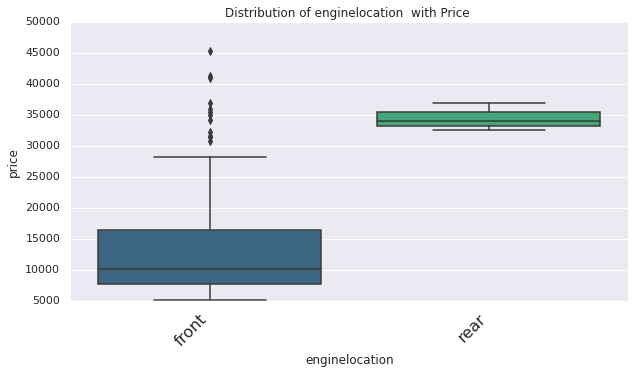

In [ ]:
plt.figure(figsize=(10,5))
chart=sns.boxplot(x="enginelocation", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=16)
plt.title('Distribution of enginelocation  with Price ')
chart;

Inisghts -

* The price of the car varies depending on where the engine is located. 

* A rear enginelocation car appears to be more expensive than a front enginelocation car. 

* The price of a rear enginelocation car is between USD 32000 and USD 38000. 

* The price of 50% of autos with front engines ranges from USD 8000 to USD 12000. 

* There are also some expensive cars with the engine at the front.

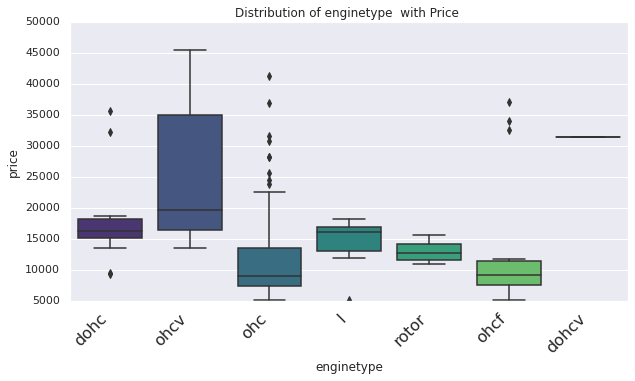

In [ ]:
plt.figure(figsize=(10,5))
chart=sns.boxplot(x="enginetype", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=16)
plt.title('Distribution of enginetype  with Price ')
chart;

Insights -

* The cost of the car varies according to the engine type. 

* Cars with "ohcv" engine types have a higher median value and a higher price range than others. 

* There is just one car in the date with the engine type "dohcv" (Porsche Cayenne). 

* A "dohc" engine type automobile is also available in a lesser price range, ranging from USD 8500 to USD 10000.

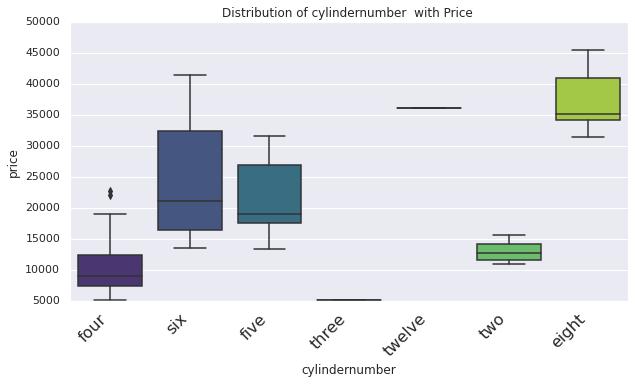

In [ ]:
plt.figure(figsize=(10,5))
chart=sns.boxplot(x="cylindernumber", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=16)
plt.title('Distribution of cylindernumber  with Price ')
chart;

Insights -

* There is variance in cars' price w.r.t. to number of cylinders. 

* The most expensive cars have eight cylinders. 

* Eight cylinders also have a greater median value than the others. 

* The data include two automobiles with three and twelve cylinders, respectively.

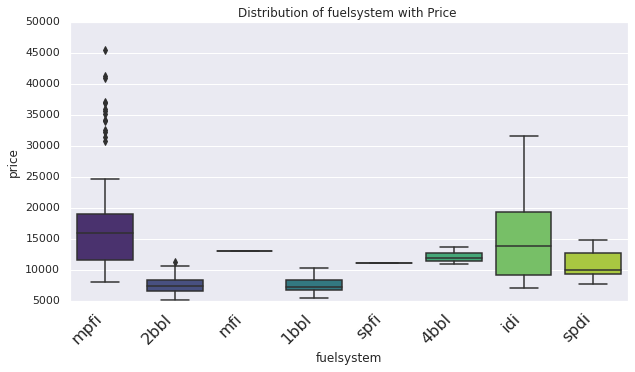

In [ ]:
plt.figure(figsize=(10,5))
chart=sns.boxplot(x="fuelsystem", y="price", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=16)
plt.title('Distribution of fuelsystem with Price ')
chart;

Insights - 

* The cost of the car changes depending on the fuel system. 

* Cars with "mpfi" fuel systems are more expensive and have a higher median value than others. 

* The data only includes two vehicles with "mfi" and "spfi" fuel systems. 

* "1bbl" and "2bbl" fuel system cars have nearly same distribution, as well as around the same median values. 

* Cars with "idi" fuel systems have a fine distribution; prices range from USD 10000 to USD 35000.

## Multi-Variate Analysis

In [ ]:
#checking the correlation among the variables.

df.corr().round(2).T

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.00,-0.15,0.13,0.17,0.05,0.26,0.07,-0.03,0.26,-0.16,0.15,-0.02,-0.20,0.02,0.01,-0.11
symboling,-0.15,1.00,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.13,-0.01,-0.18,0.07,0.27,-0.04,0.03,-0.08
wheelbase,0.13,-0.53,1.00,0.87,0.80,0.59,0.78,0.57,0.49,0.16,0.25,0.35,-0.36,-0.47,-0.54,0.58
carlength,0.17,-0.36,0.87,1.00,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.55,-0.29,-0.67,-0.70,0.68
carwidth,0.05,-0.23,0.80,0.84,1.00,0.28,0.87,0.74,0.56,0.18,0.18,0.64,-0.22,-0.64,-0.68,0.76
carheight,0.26,-0.54,0.59,0.49,0.28,1.00,0.30,0.07,0.17,-0.06,0.26,-0.11,-0.32,-0.05,-0.11,0.12
curbweight,0.07,-0.23,0.78,0.88,0.87,0.30,1.00,0.85,0.65,0.17,0.15,0.75,-0.27,-0.76,-0.80,0.84
enginesize,-0.03,-0.11,0.57,0.68,0.74,0.07,0.85,1.00,0.58,0.20,0.03,0.81,-0.24,-0.65,-0.68,0.87
boreratio,0.26,-0.13,0.49,0.61,0.56,0.17,0.65,0.58,1.00,-0.06,0.01,0.57,-0.25,-0.58,-0.59,0.55
stroke,-0.16,-0.01,0.16,0.13,0.18,-0.06,0.17,0.20,-0.06,1.00,0.19,0.08,-0.07,-0.04,-0.04,0.08


The correlation coefficient ranges from -1 to 1, where -1 represents a perfect negative correlation, 0 represents no correlation, and 1 represents a perfect positive correlation. A positive correlation means that as one variable increases, the other variable also tends to increase, while a negative correlation means that as one variable increases, the other variable tends to decrease.

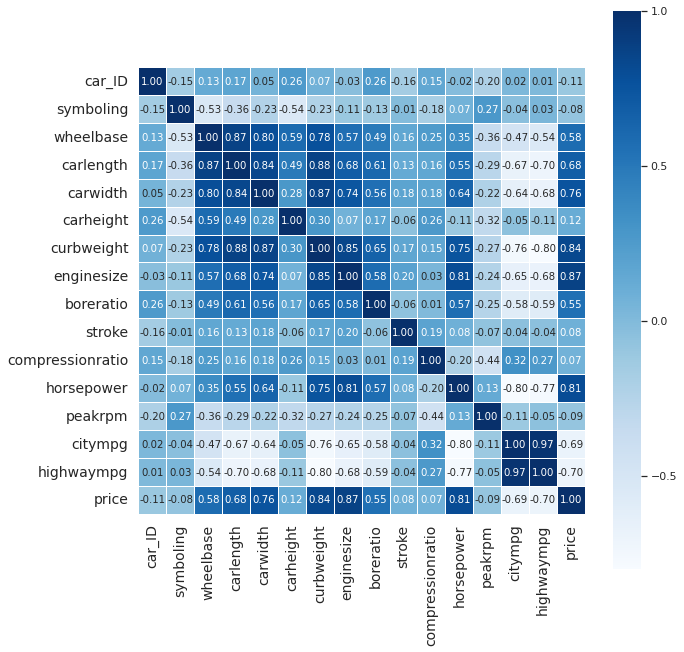

In [ ]:
corr=df.corr()
plt.figure(figsize=(10,10)) 
sns.heatmap(corr,annot=True,cmap="Blues",linewidth=0.85,square=True,annot_kws={"size":10.10},fmt='.2f')
plt.xticks(fontsize=14)
plt.yticks(size=14)
plt.show()

Insights - 

* There is a strong correlation of wheelbase with carlenght i.e. 0.87 , with carwidth i.e. 0.80  , with curbweight i.e. 0.78. Moreover , wheel base have a  negetive correlation with citympg (-0.47) and highwaympg (-0.54)

* There is strong correaltion of carlength with wheelbase(0.87) , with carwidth its correlation is (0.84) , with curb weight its correlation (0.88).

* Carlenght also have fine correaltion with engine size ,boreratio and price i.e. 0.68 0.61 and 0.68 respectively. Whereas carlenght also have significant negetive correlation with  citympg(-0.67) and highwaympg (-0.70).

* Carwidth have strong correlation with wheel base ( 0.80) , carlength (0.84)
curbweight (0.87)  engine size (0.74) , horsepower (0.64 ) and price (0.76).Whereas carwdth also have significant negetive correlation with  citympg(-0.64) and highwaympg (-0.68).

* Curbweight have strong correlation with wheelbase(0.78) , with carlength(0.88), with car width (0.87) , with engine size (0.85) , with horsepowe (0.75) , with price (0.84) and with boreration (0.65). Whereas curbweight have significant negetive correlation with  citympg(-0.76) and highwaympg (-0.80).

* engine size has strong correlation with carlenght (0.68) , with car width (0.74) , with curb weight (0.85) , with boreratio (0.58) , with horsepower (0.81) and with price (0.87).Whereas engine size have significant negetive correlation with  citympg(-0.65) and highwaympg (-0.68).

* boreratio have correlation with wheelbase (0.49) , with carlenght (0.61) , with carwidth (0.56) , with curbweight (0.65) , with engine size (0.58) , with horsepower (0.57) and with price(0.55). Whereas boreratio  have significant negetive correlation with  citympg(-0.58) and highwaympg (-0.59).

* stroke and compression ration doesn't have any significant correlation with other features.

* horsepower have strong correlation with price (0.81) , with engine size (0.81) and with curb weight (0.75).Whereas horsepower  have significant negetive correlation with  citympg(-0.80) and highwaympg (-0.77).

* citympg have significantly negetive correlation with carlength (-0.67) , with carwidth (-0.64) , with curbweight(-0.76) , with engien size (-0.65), with boreratio (-0.58) , with horsepower (-0.80) and with price (-0.69). Whereas citympg has very strong correlation with highwaympg (0.97).

* highwaympg have significantly negetive correlation with carlength (-0.70) , with carwidth (-0.68) , with curbweight(-0.80) , with engien size (-0.68), with boreratio (-0.59) , with horsepower (-0.77) and with price (-0.70). Whereas citympg has very strong correlation with highwaympg (0.97).

* price have ignificant correlation with wheelbase(0.58) , with carlength (0.68) , with carwidth (0.76) , with curbweight (0.84) , with engine size (0.87) , with boreratio (0.55) , with horsepower (0.81) and with city mpg and higway mpg (-0.69 and -0.70) respectively.

Note - After checking the correlation we conclude that wheelbase , carlength carwidth , curbweight , engine size , boreratio , horsepower city mpg and higway mpg are good predictors to predict the price  of car.

In [ ]:
#Feature Selection- Based on Correlation - For Numerical Feature.
X = df.drop("price",axis=1)   #Feature Matrix
y = df["price"] 

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((143, 25), (62, 25))

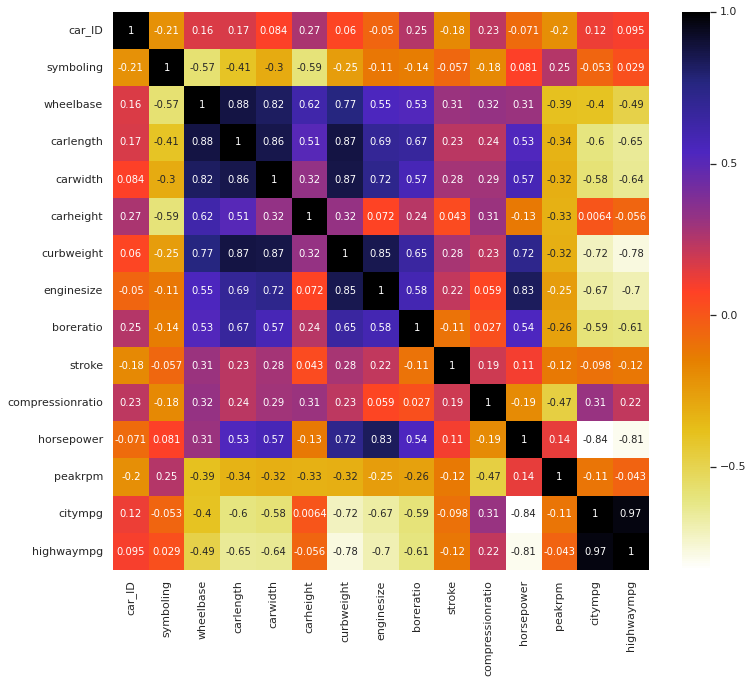

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.50) #including those features which have correlation value more 0.50 irespective of (+ or - signs)
len(set(corr_features))

10

In [ ]:
print(corr_features) 

{'citympg', 'carheight', 'carlength', 'horsepower', 'highwaympg', 'carwidth', 'boreratio', 'enginesize', 'wheelbase', 'curbweight'}


Insights - 

 {'boreratio', 'highwaympg', 'enginesize', 'horsepower', 'carheight', 'wheelbase', 'carwidth', 'curbweight', 'carlength', 'citympg'} -- these features best decribes or predict best the price for a car.

### Data Encoding 

In [ ]:
#checking for object d-type variables.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CARNAME :  147
volvo diesel            1
dodge coronet custom    1
dodge colt (sw)         1
dodge colt hardtop      1
dodge monaco (sw)       1
                       ..
mitsubishi mirage g4    3
subaru dl               4
peugeot 504             6
toyota corolla          6
toyota corona           6
Name: CarName, Length: 147, dtype: int64


FUELTYPE :  2
diesel     20
gas       185
Name: fueltype, dtype: int64


ASPIRATION :  2
turbo     37
std      168
Name: aspiration, dtype: int64


DOORNUMBER :  2
two      90
four    115
Name: doornumber, dtype: int64


CARBODY :  5
convertible     6
hardtop         8
wagon          25
hatchback      70
sedan          96
Name: carbody, dtype: int64


DRIVEWHEEL :  3
4wd      9
rwd     76
fwd    120
Name: drivewheel, dtype: int64


ENGINELOCATION :  2
rear       3
front    202
Name: enginelocation, dtype: int64


ENGINETYPE :  7
dohcv      1
rotor      4
dohc      12
l         12
ohcv      13
ohcf      15
ohc      148
Name: enginetype, dtype: int64

In [ ]:
pd.options.display.max_columns = None

In [ ]:
#one-hot encoding 
df = pd.get_dummies(df, columns=['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','cylindernumber','enginetype','fuelsystem'],drop_first=True)



In [ ]:
df.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Ordinal Lable Enconding 

Note - we tried ordinal label encoding on few features like drivewheel , fuel system but we didnot get significant outputs , hence we go with one hot endong method i.e. it increase the dimensions but help to achieve the desired output.

Yes, there is an order among 4WD, RWD, and FWD, which is based on the way power is delivered to the wheels of a vehicle.

* RWD, which stands for Rear Wheel Drive, is a type of vehicle in which the power is transmitted from the engine to the rear wheels. This setup offers excellent handling and stability, particularly in high-performance vehicles, as the weight of the vehicle is distributed evenly between the front and rear wheels. RWD is commonly found in sports cars and pickup trucks.

* FWD, which stands for Front Wheel Drive, is a type of vehicle in which the power is transmitted from the engine to the front wheels. FWD vehicles offer improved fuel efficiency and better traction in slippery conditions than RWD vehicles because the weight of the engine is over the front wheels, providing better grip. FWD is commonly found in economy cars and small SUVs.

* 4WD, which stands for Four Wheel Drive, is a type of vehicle that is designed to provide power to all four wheels. This type of setup is particularly useful for off-road driving, as it provides maximum traction on uneven terrain. 4WD is commonly found in pickup trucks and SUVs designed for off-road use.

So, the order of these three types of drive systems based on their power delivery is as follows:

RWD < FWD < 4WD

so we are doing ordinal label encoding on drive wheel feature i.e.
"rwd" : 0
"fwd" : 1
"4wd" : 2

In [ ]:
#Before Encoding
#df["drivewheel"].value_counts()

In [ ]:
#df['drivewheel']=np.where(df['drivewheel'] =='rwd', '0', df['drivewheel'])
#df['drivewheel']=np.where(df['drivewheel'] =='fwd', '1', df['drivewheel'])
#df['drivewheel']=np.where(df['drivewheel'] =='4wd', '2', df['drivewheel'])

In [ ]:
#After Encoding
#df["drivewheel"].value_counts(ascending=True)

In [ ]:
#Before Encoding
#df["fuelsystem"].value_counts()

Yes, there is an order among these terms based on the type of fuel delivery system they represent:

1bbl (one-barrel carburetor)
2bbl (two-barrel carburetor)
4bbl (four-barrel carburetor)
MFI (Multi-Port Fuel Injection)
MPFI (Multi-Point Fuel Injection)
SPFI (Single-Point Fuel Injection)
SPDI (Sequential Port Diesel Injection)
IDI (Indirect Diesel Injection)

This order generally represents the progression of fuel delivery technology from carbureted systems (1bbl, 2bbl, 4bbl) to more advanced electronic fuel injection systems (MFI, MPFI, SPFI, SPDI, IDI).

so we are doing ordinal label encoding on fuel system feature i.e. 
"1bbl" : 0
"2bbl" : 1
"4bbl" : 2
"MFI"  : 3
"MPFI" : 4
"SPFI" : 5
"SPDI" : 6
"IDI"  : 7

In [ ]:
#df['fuelsystem']=np.where(df['fuelsystem'] =='1bbl', '0', df['fuelsystem'])
#df['fuelsystem']=np.where(df['fuelsystem'] =='2bbl', '1', df['fuelsystem'])
#df['fuelsystem']=np.where(df['fuelsystem'] =='4bbl', '2', df['fuelsystem'])
#df['fuelsystem']=np.where(df['fuelsystem'] =='mfi', '3', df['fuelsystem'])
#df['fuelsystem']=np.where(df['fuelsystem'] =='mpfi', '4', df['fuelsystem'])
#df['fuelsystem']=np.where(df['fuelsystem'] =='spfi', '5', df['fuelsystem'])
#df['fuelsystem']=np.where(df['fuelsystem'] =='spdi', '6', df['fuelsystem'])
#df['fuelsystem']=np.where(df['fuelsystem'] =='idi', '7', df['fuelsystem'])

In [ ]:
#After Encoding
#df["fuelsystem"].value_counts()

there is an order among these terms based on their meaning:

OHV (Overhead Valve) or Pushrod Engine
OHC (Overhead Cam) Engine
SOHC (Single Overhead Cam) Engine
DOHC (Double Overhead Cam) Engine
DOHCV (Double Overhead Cam Variable Valve Timing) Engine
ROTOR Engine (used in rotary engines)
This order is based on the increasing complexity and sophistication of the engine design, with OHV being the simplest and ROTOR being the most complex.

In [ ]:
#Converting the datatypes of lable encoded variables into int64
#df['drivewheel'] = df['drivewheel'].astype('int64')
#df['fuelsystem'] = df['fuelsystem'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_ID                 205 non-null    int64  
 1   symboling              205 non-null    int64  
 2   CarName                205 non-null    object 
 3   wheelbase              205 non-null    float64
 4   carlength              205 non-null    float64
 5   carwidth               205 non-null    float64
 6   carheight              205 non-null    float64
 7   curbweight             205 non-null    int64  
 8   enginesize             205 non-null    int64  
 9   boreratio              205 non-null    float64
 10  stroke                 205 non-null    float64
 11  compressionratio       205 non-null    float64
 12  horsepower             205 non-null    int64  
 13  peakrpm                205 non-null    int64  
 14  citympg                205 non-null    int64  
 15  highwa

### Building Linear Regreesion Model

In [ ]:
#Dropping the unnecessary Columns.

In [ ]:
df.drop(['car_ID', 'CarName'], axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    int64  
 6   enginesize             205 non-null    int64  
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    int64  
 11  peakrpm                205 non-null    int64  
 12  citympg                205 non-null    int64  
 13  highwaympg             205 non-null    int64  
 14  price                  205 non-null    float64
 15  fuelty

In [ ]:
#Checking the Records of the Dataset after dropping the unusal columns.
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
#df.to_csv('Car_Price_Prediction_Modelling_data_2') 

In [ ]:
#Train-Test Split for Model Building
#Split X and Y into training and test set in 70:30 ratio.

X = df.drop('price',axis=1)
Y = df[['price']]

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [ ]:
#Linear Regression Model-1 using Sklearn.
from sklearn.linear_model import LinearRegression
regression_model= LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#Explore the coefficients for each of the independent attributes.
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}" . format(col_name, regression_model.coef_[0][idx].round(2)))

The coefficient for symboling is 316.14
The coefficient for wheelbase is 130.0
The coefficient for carlength is -127.46
The coefficient for carwidth is 894.63
The coefficient for carheight is 145.82
The coefficient for curbweight is 2.32
The coefficient for enginesize is 146.08
The coefficient for boreratio is -4116.6
The coefficient for stroke is -3817.95
The coefficient for compressionratio is -843.22
The coefficient for horsepower is 3.49
The coefficient for peakrpm is 1.75
The coefficient for citympg is -176.07
The coefficient for highwaympg is 177.04
The coefficient for fueltype_gas is -6317.06
The coefficient for aspiration_turbo is 1424.26
The coefficient for doornumber_two is -497.24
The coefficient for carbody_hardtop is -4190.52
The coefficient for carbody_hatchback is -2548.47
The coefficient for carbody_sedan is -1130.96
The coefficient for carbody_wagon is -2044.71
The coefficient for drivewheel_fwd is -530.42
The coefficient for drivewheel_rwd is 1301.19
The coefficient f

In [ ]:
#Intercept for the Model
regression_model.intercept_

array([-33750.79956783])

In [ ]:
#R Square on Training Data
regression_model.score(X_train,Y_train).round(2)

0.95

In [ ]:
#R Square on Testing Data
regression_model.score(X_test,Y_test).round(2)

0.88

In [ ]:
from numpy import math
from sklearn import metrics

In [ ]:
#RMSE on Training Data
predicted_train= regression_model.fit(X_train,Y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(Y_train,predicted_train))

1832.3938900861363

In [ ]:
#RMSE on Testing Data
predicted_test= regression_model.fit(X_train,Y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(Y_test,predicted_test))

2688.7862673116465

In [ ]:
#Linear Regression Model Using statsmodels.
# concatenate X and Y into a single dataframe
data_train= pd.concat([X_train,Y_train],axis=1)
data_test= pd.concat([X_test,Y_test],axis=1)
data_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
124,3,95.9,173.2,66.3,50.2,2818,156,3.59,3.86,7.0,145,5000,19,24,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,12764.0
181,-1,104.5,187.8,66.5,54.1,3151,161,3.27,3.35,9.2,156,5200,19,24,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,15750.0
154,0,95.7,169.7,63.6,59.1,2290,92,3.05,3.03,9.0,62,4800,27,32,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,7898.0
53,1,93.1,166.8,64.2,54.1,1945,91,3.03,3.15,9.0,68,5000,31,38,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,6695.0
94,1,94.5,165.3,63.8,54.5,1951,97,3.15,3.29,9.4,69,5200,31,37,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,7299.0


In [ ]:
data_test.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
78,2,93.7,157.3,64.4,50.8,2004,92,2.97,3.23,9.4,68,5500,31,38,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,6669.0
97,1,94.5,170.2,63.8,53.5,2037,97,3.15,3.29,9.4,69,5200,31,37,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,7999.0
151,1,95.7,158.7,63.6,54.5,2040,92,3.05,3.03,9.0,62,4800,31,38,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,6338.0
44,1,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70,5400,38,43,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,8916.5
40,0,96.5,175.4,62.5,54.1,2372,110,3.15,3.58,9.0,86,5800,27,33,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,10295.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    int64  
 6   enginesize             205 non-null    int64  
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    int64  
 11  peakrpm                205 non-null    int64  
 12  citympg                205 non-null    int64  
 13  highwaympg             205 non-null    int64  
 14  price                  205 non-null    float64
 15  fuelty

In [ ]:
#For Training Data
expr= 'price ~ symboling + wheelbase +  + carlength + carwidth    + carheight  + curbweight + enginesize + boreratio + stroke  + compressionratio  + horsepower  + peakrpm + citympg  + highwaympg + fueltype_gas + aspiration_turbo + doornumber_two  + carbody_hardtop + carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_fwd + drivewheel_rwd + enginelocation_rear + cylindernumber_five  + cylindernumber_four + cylindernumber_six + cylindernumber_three  + cylindernumber_twelve  + cylindernumber_two  + enginetype_dohcv + enginetype_l + enginetype_ohc  + enginetype_ohcf + enginetype_ohcv + enginetype_rotor + fuelsystem_2bbl + fuelsystem_4bbl + fuelsystem_idi  + fuelsystem_mfi + fuelsystem_mpfi + fuelsystem_spdi + fuelsystem_spfi'

In [ ]:
import statsmodels.formula.api as smf
lm_train= smf.ols(formula=expr, data=data_train).fit()
lm_train.params.round(2)

Intercept               -22500.53
symboling                  316.14
wheelbase                  130.00
carlength                 -127.46
carwidth                   894.63
carheight                  145.82
curbweight                   2.32
enginesize                 146.08
boreratio                -4116.60
stroke                   -3817.95
compressionratio          -843.22
horsepower                   3.49
peakrpm                      1.75
citympg                   -176.07
highwaympg                 177.04
fueltype_gas            -17567.33
aspiration_turbo          1424.26
doornumber_two            -497.24
carbody_hardtop          -4190.52
carbody_hatchback        -2548.47
carbody_sedan            -1130.96
carbody_wagon            -2044.71
drivewheel_fwd            -530.42
drivewheel_rwd            1301.19
enginelocation_rear      11317.24
cylindernumber_five      -6215.09
cylindernumber_four      -5768.92
cylindernumber_six       -5741.93
cylindernumber_three        -0.00
cylindernumber

In [ ]:
print(lm_train.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     49.92
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.50e-51
Time:                        18:37:29   Log-Likelihood:                -1277.3
No. Observations:                 143   AIC:                             2633.
Df Residuals:                     104   BIC:                             2748.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -2.25e+

In [ ]:
#Calculate RMSE of Train Data
mse= np.mean((lm_train.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
np.sqrt(mse)

1832.3938900861376

In [ ]:
#Hypothesis Test

#H0 : There is no relationship between independent and the dependent variable.

#H1 : There is a relationship between independent and the dependent variable.

Insights -

Note - We know that if pvalue < 0.05 reject the null hypohesis & if pvalue > 0.05 we fail to reject the null hypothesis.Here we found p value of following features like symboling , wheel base , car height , compressionratio , horsepower , citympg , highway mpg , aspiration_turbo  , carbody_hatchback , carbody_sedan ,carbody_wagon , drivewheel_fwd ,drivewheel_rwd , cylindernumber_four,  cylindernumber_three , cylindernumber_two , enginetype_dohcv , enginetype_l  , enginetype_ohc , enginetype_ohcf ,enginetype_rotor and fuel_system found to have p value greater than 0.05 , are not good predictors to predict price.  

In [ ]:
#Linear Regression Expression for Train Data.

for i,j in np.array(lm_train.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')


(-22500.53) * Intercept + (316.14) * symboling + (130.0) * wheelbase + (-127.46) * carlength + (894.63) * carwidth + (145.82) * carheight + (2.32) * curbweight + (146.08) * enginesize + (-4116.6) * boreratio + (-3817.95) * stroke + (-843.22) * compressionratio + (3.49) * horsepower + (1.75) * peakrpm + (-176.07) * citympg + (177.04) * highwaympg + (-17567.33) * fueltype_gas + (1424.26) * aspiration_turbo + (-497.24) * doornumber_two + (-4190.52) * carbody_hardtop + (-2548.47) * carbody_hatchback + (-1130.96) * carbody_sedan + (-2044.71) * carbody_wagon + (-530.42) * drivewheel_fwd + (1301.19) * drivewheel_rwd + (11317.24) * enginelocation_rear + (-6215.09) * cylindernumber_five + (-5768.92) * cylindernumber_four + (-5741.93) * cylindernumber_six + (-0.0) * cylindernumber_three + (-11055.06) * cylindernumber_twelve + (893.89) * cylindernumber_two + (-3617.53) * enginetype_dohcv + (-2300.17) * enginetype_l + (2119.44) * enginetype_ohc + (1411.02) * enginetype_ohcf + (-3975.52) * enginety

In [ ]:
#For Test Data
import statsmodels.formula.api as smf
lm_test= smf.ols(formula=expr, data=data_test).fit()
lm_test.params.round(2)

Intercept                14811.49
symboling                -1029.01
wheelbase                   60.41
carlength                    1.64
carwidth                   498.87
carheight                 -557.43
curbweight                   1.97
enginesize                 -19.97
boreratio                 9116.86
stroke                   -6229.84
compressionratio          -337.73
horsepower                  87.79
peakrpm                      2.15
citympg                   -209.42
highwaympg                 193.86
fueltype_gas              2312.97
aspiration_turbo          -142.13
doornumber_two             290.74
carbody_hardtop          -4416.50
carbody_hatchback        -5602.35
carbody_sedan            -5365.99
carbody_wagon            -5781.67
drivewheel_fwd            -606.96
drivewheel_rwd           -2473.02
enginelocation_rear          0.00
cylindernumber_five     -32397.89
cylindernumber_four     -37589.95
cylindernumber_six      -21776.46
cylindernumber_three    -30888.62
cylindernumber

In [ ]:
print(lm_test.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     32.68
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.44e-13
Time:                        18:37:29   Log-Likelihood:                -521.25
No. Observations:                  62   AIC:                             1118.
Df Residuals:                      24   BIC:                             1199.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.481e+

In [ ]:
mse= np.mean((lm_test.predict(data_test.drop('price',axis=1))-data_test['price'])**2)
np.sqrt(mse)

1083.889540417742

In [ ]:
#Linear Regression Expression for Test Data.
for i,j in np.array(lm_test.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(14811.49) * Intercept + (-1029.01) * symboling + (60.41) * wheelbase + (1.64) * carlength + (498.87) * carwidth + (-557.43) * carheight + (1.97) * curbweight + (-19.97) * enginesize + (9116.86) * boreratio + (-6229.84) * stroke + (-337.73) * compressionratio + (87.79) * horsepower + (2.15) * peakrpm + (-209.42) * citympg + (193.86) * highwaympg + (2312.97) * fueltype_gas + (-142.13) * aspiration_turbo + (290.74) * doornumber_two + (-4416.5) * carbody_hardtop + (-5602.35) * carbody_hatchback + (-5365.99) * carbody_sedan + (-5781.67) * carbody_wagon + (-606.96) * drivewheel_fwd + (-2473.02) * drivewheel_rwd + (0.0) * enginelocation_rear + (-32397.89) * cylindernumber_five + (-37589.95) * cylindernumber_four + (-21776.46) * cylindernumber_six + (-30888.62) * cylindernumber_three + (-0.0) * cylindernumber_twelve + (-18494.54) * cylindernumber_two + (-0.0) * enginetype_dohcv + (-656.48) * enginetype_l + (1529.75) * enginetype_ohc + (-7929.33) * enginetype_ohcf + (-17872.57) * enginetype_oh

**Observation from Model 1 -** 


One possible explanation for getting a lower RMSE on the test data than on the training data is that the model is too complex for the amount of training data available. In other words, the model has too many features or variables relative to the number of observations in the training data. This can cause the model to fit the training data too closely and capture noise or randomness, leading to a higher RMSE on the training data and a lower RMSE on the test data.

Note - There is strong multicollinearity among features.

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.50) #including those features which have correlation value more 0.50 irespective of (+ or - signs)
len(set(corr_features))

26

In [ ]:
print(corr_features) #features with multicollinearity , we choose feature from them as per the context of problem.

{'carheight', 'drivewheel_fwd', 'horsepower', 'enginetype_rotor', 'enginelocation_rear', 'fuelsystem_2bbl', 'fueltype_gas', 'carbody_sedan', 'citympg', 'highwaympg', 'cylindernumber_six', 'boreratio', 'wheelbase', 'carbody_hatchback', 'curbweight', 'fuelsystem_4bbl', 'enginesize', 'drivewheel_rwd', 'enginetype_ohcv', 'enginetype_ohcf', 'carlength', 'fuelsystem_mpfi', 'fuelsystem_idi', 'carwidth', 'cylindernumber_four', 'doornumber_two'}


Observation - 

Because these are the characteristics in the dataset that create multicollinearity, we will select the best feature for predicting the price of a car from the above results  by comapring them with the p-value. Specifically, if any feature in the corr features list has a p value greater than 0.05, we will discard that feature and build our second model with other features and analyze it.

In [ ]:
print(lm_train.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     49.92
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.50e-51
Time:                        18:37:29   Log-Likelihood:                -1277.3
No. Observations:                 143   AIC:                             2633.
Df Residuals:                     104   BIC:                             2748.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -2.25e+

Results-

On comapring these features with their p value we select the following features - enginesize , enginetype_ohcv,enginetype_ohc , citympg, horespower , drivewheel_rwd, cylindernumber_six ,cylindernumber_five , cylindernumber_twelve , carbodytype_hardto , boreratio ,enginelocation_rear and cylinder_twelve , enginetype_ohc , carlenght , carwidth , stroke ,peak rpm and fueltype_gas for building our next model.

In [ ]:
#Linear Regression Model 2 -

#For Training Data
expr_2= 'price ~ symboling + wheelbase +  carlength + carwidth    + carheight  + enginesize + boreratio + stroke    + horsepower  + peakrpm + citympg  + fueltype_gas + aspiration_turbo + carbody_hardtop + carbody_hatchback + carbody_sedan + drivewheel_rwd + enginelocation_rear + cylindernumber_five  + cylindernumber_six  + cylindernumber_twelve  +  enginetype_ohc  + enginetype_ohcv '

In [ ]:
lm_train_2= smf.ols(formula=expr_2, data=data_train).fit()
lm_train_2.params.round(2)

Intercept               -43793.59
symboling                  117.73
wheelbase                   60.85
carlength                 -159.66
carwidth                  1235.38
carheight                  111.32
enginesize                 160.19
boreratio                -5019.57
stroke                   -3910.05
horsepower                   5.83
peakrpm                      1.16
citympg                   -206.52
fueltype_gas             -2642.12
aspiration_turbo           484.61
carbody_hardtop          -3390.53
carbody_hatchback        -1379.84
carbody_sedan              373.32
drivewheel_rwd            2325.67
enginelocation_rear      12528.75
cylindernumber_five       -678.56
cylindernumber_six       -2014.29
cylindernumber_twelve   -13812.93
enginetype_ohc            1493.88
enginetype_ohcv          -2894.52
dtype: float64

In [ ]:
print(lm_train_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     64.13
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           3.74e-56
Time:                        18:37:29   Log-Likelihood:                -1303.2
No. Observations:                 143   AIC:                             2654.
Df Residuals:                     119   BIC:                             2726.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -4.379e+

Conclusion - Dropping those feature which have p-value more than 0.05.

In [ ]:
#Linear Regression Model -3 
#For Training Data
expr_3= 'price ~  carlength + carwidth    + enginesize + boreratio + stroke    + horsepower  + citympg  + fueltype_gas  + carbody_hardtop + carbody_hatchback + drivewheel_rwd + enginelocation_rear  + cylindernumber_twelve  +  enginetype_ohc  + enginetype_ohcv '

In [ ]:
lm_train_3= smf.ols(formula=expr_3, data=data_train).fit()
lm_train_3.params.round(2)

Intercept               -44503.95
carlength                 -145.58
carwidth                  1474.68
enginesize                 134.56
boreratio                -4340.67
stroke                   -3718.56
horsepower                   9.71
citympg                   -207.73
fueltype_gas             -2269.25
carbody_hardtop          -2936.27
carbody_hatchback        -1828.40
drivewheel_rwd            2328.60
enginelocation_rear      12099.91
cylindernumber_twelve   -10940.98
enginetype_ohc            1843.04
enginetype_ohcv          -2898.69
dtype: float64

In [ ]:
print(lm_train_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     96.86
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           7.10e-62
Time:                        18:37:29   Log-Likelihood:                -1308.5
No. Observations:                 143   AIC:                             2649.
Df Residuals:                     127   BIC:                             2696.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -4.45e+

Conclusion - As all the fearures have p value less than 0.05  , so finalise these feature to predict the price for a car.

In [ ]:
#Calculate RMSE of Train Data
mse= np.mean((lm_train_3.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
np.sqrt(mse)

2278.7897238892615

In [ ]:
#Linear Regression Model -3 Expression on Train Data
for i,j in np.array(lm_train_3.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-44503.95) * Intercept + (-145.58) * carlength + (1474.68) * carwidth + (134.56) * enginesize + (-4340.67) * boreratio + (-3718.56) * stroke + (9.71) * horsepower + (-207.73) * citympg + (-2269.25) * fueltype_gas + (-2936.27) * carbody_hardtop + (-1828.4) * carbody_hatchback + (2328.6) * drivewheel_rwd + (12099.91) * enginelocation_rear + (-10940.98) * cylindernumber_twelve + (1843.04) * enginetype_ohc + (-2898.69) * enginetype_ohcv + 

Insights - 

With unit increase in carlenght price of car will decrease by ((-145.58),similary with unit increase in carwidth price of car will increase by (1474.68) , with unit increase in engine size price of car increase by 134.56 and in same the criteria will happen for all others features i.e. it will increase or decrease by there respective cofficient values..

Note - All the insights genrated from data and plots are mention above with details.

In [ ]:
#For Test Data
import statsmodels.formula.api as smf
lm_test_3= smf.ols(formula=expr_3, data=data_test).fit()
lm_test_3.params.round(2)

Intercept                  608.88
carlength                   54.89
carwidth                   570.99
enginesize                 125.55
boreratio               -11730.83
stroke                   -7926.85
horsepower                 139.31
citympg                     71.83
fueltype_gas             -1830.56
carbody_hardtop             44.68
carbody_hatchback         -611.41
drivewheel_rwd            2865.35
enginelocation_rear          0.00
cylindernumber_twelve        0.00
enginetype_ohc             951.88
enginetype_ohcv         -10379.36
dtype: float64

In [ ]:
print(lm_train_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     96.86
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           7.10e-62
Time:                        18:41:01   Log-Likelihood:                -1308.5
No. Observations:                 143   AIC:                             2649.
Df Residuals:                     127   BIC:                             2696.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -4.45e+

In [ ]:
#Calculate RMSE of Test Data
mse= np.mean((lm_test_3.predict(data_test.drop('price',axis=1))-data_test['price'])**2)
np.sqrt(mse)

2205.797680615537

In [ ]:
#Linear Regression Model -3 Expression on Test Data
for i,j in np.array(lm_test_3.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(608.88) * Intercept + (54.89) * carlength + (570.99) * carwidth + (125.55) * enginesize + (-11730.83) * boreratio + (-7926.85) * stroke + (139.31) * horsepower + (71.83) * citympg + (-1830.56) * fueltype_gas + (44.68) * carbody_hardtop + (-611.41) * carbody_hatchback + (2865.35) * drivewheel_rwd + (0.0) * enginelocation_rear + (0.0) * cylindernumber_twelve + (951.88) * enginetype_ohc + (-10379.36) * enginetype_ohcv + 

## Important Questions -


Question 1 - Which variables are significant in predicting the price of a car?

Answer -  The significant features in predicting the price as per data analysis are follows - carlength , carwidth , engineszie , boreratio , stroke , horsepower , citympg , fueltype_gas  , carbody_hardtop  , carbody_hatchback , drivewheel_rwd  , enginelocation_rear  , cylindernumber_twelve , enginetype_ohc  and enginetype_ohcv.  

Question 2 - How well those variables describe the price of a car ?

Answer - (-44503.95) * Intercept + (-145.58) * carlength + (1474.68) * carwidth + (134.56) * enginesize + (-4340.67) * boreratio + (-3718.56) * stroke + (9.71) * horsepower + (-207.73) * citympg + (-2269.25) * fueltype_gas + (-2936.27) * carbody_hardtop + (-1828.4) * carbody_hatchback + (2328.6) * drivewheel_rwd + (12099.91) * enginelocation_rear + (-10940.98) * cylindernumber_twelve + (1843.04) * enginetype_ohc + (-2898.69) * enginetype_ohcv 

--- With unit increase in carlenght price of car will decrease by ((-145.58),similary with unit increase in carwidth price of car will increase by (1474.68) , with unit increase in engine size price of car increase by 134.56 and in same the criteria will happen for all others features i.e. it will increase or decrease by there respective cofficient values.


Important Note - we also tried to build linear regression model with differnet combinations of features and check there performance as well. If we talk about in terms of model building we finalise our Model -3 as it has good score of R-square and Adj R- square metric with significant RMSE on train and test data.



In [ ]:
#End